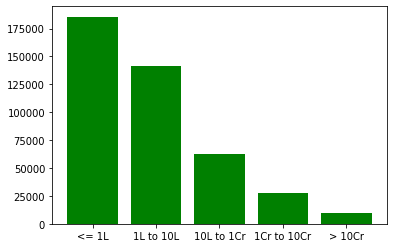

In [23]:
import csv
import matplotlib.pyplot as plt
from collections import Counter



data_csv='Maharashtra.csv'
def read_data(csv): 
    # Reading Data from csv
    with open(data_csv,'r',errors='ignore') as f:
        csv_reader = csv.DictReader(f)
        companies_list=list(csv_reader)
    return companies_list

def data_classification_Auth_cap(csv):
    data=read_data(csv)
    classified_data={'<= 1L':0,'1L to 10L':0,'10L to 1Cr':0,'1Cr to 10Cr':0,'> 10Cr':0}
    for row in data:
        try:
            if int(row['AUTHORIZED_CAP'])<=100000:
              classified_data['<= 1L']+=1
            elif 100000 < int(row['AUTHORIZED_CAP']) <=1000000:
              classified_data['1L to 10L']+=1
            elif 1000000 < int(row['AUTHORIZED_CAP']) <=10000000:
              classified_data['10L to 1Cr']+=1
            elif 10000000 < int(row['AUTHORIZED_CAP']) <=100000000:
              classified_data['1Cr to 10Cr']+=1
            else:
              classified_data['> 10Cr']+=1  
        except:
            classified_data['> 10Cr']+=1
             

    return classified_data

def plot_hist(csv):
    classified_data=data_classification_Auth_cap(csv)
    plt.bar(list(classified_data.keys()), classified_data.values(), color='g')
    plt.show()

plot_hist(csv)


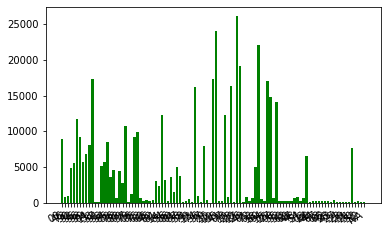

In [11]:
def data_year_wise_registration(csv):
    data=read_data(csv)
    year_of_registraion={}
    for row in data:
        year_of_registraion[row['DATE_OF_REGISTRATION'][-2:]]=0

    for row in data:
        year_of_registraion[row['DATE_OF_REGISTRATION'][-2:]]+=1
        
    return year_of_registraion


def plot_bar(csv):
    classified_data=data_year_wise_registration(csv)
    plt.bar(list(classified_data.keys()), classified_data.values(), color='g')
    plt.gcf().autofmt_xdate()
    plt.show()

def execution_year_registrayions(csv):
    plot_bar(csv)

execution_year_registrayions(csv)

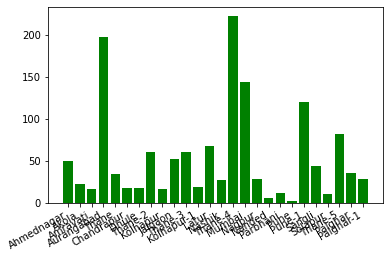

In [16]:
data_csv='districts.csv'
def getting_districts_data(csv):
    data=read_data(csv)
    districts_info={}
    for row in data:
        districts_info[row['District']]=row['Pin Code']
    return districts_info

districts_info=getting_districts_data(csv)
data_csv='Maharashtra.csv'
def District_wise_Registrations(csv):
    data=read_data(csv)
    pin_codes=[]
    for row in data:
        if row['DATE_OF_REGISTRATION'][-2:]=='15':
            pin_codes.append(row['Registered_Office_Address'][-6:])
    Districts_registrations={}
    for District,pin in districts_info.items():
        if str(pin) in pin_codes:
            Districts_registrations[District]=0
    for District,pin in districts_info.items():
        if str(pin) in pin_codes:
            Districts_registrations[District]+=pin_codes.count(str(pin))
    
    
    return Districts_registrations

def plot_bar(csv):
    classified_data=District_wise_Registrations(csv)
    plt.bar(list(classified_data.keys()), classified_data.values(), color='g')
    plt.gcf().autofmt_xdate()
    plt.show()

def execution_district_registrations(csv):
    plot_bar(csv)

execution_district_registrations(csv)





In [31]:
def get_year_wise_top_Business_activities(csv):
    data=read_data(csv)
    last_10_years_data={}
    for year in range(12,22):
        last_10_years_data[str(year)]=[]       
    for row in data:
        if row['DATE_OF_REGISTRATION'][-2:] in list(last_10_years_data.keys()):
            last_10_years_data[row['DATE_OF_REGISTRATION'][-2:]].append(row['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'])
    
    top_5_activities={}
    for year, business_activities in last_10_years_data.items():
        top_5_activities[year]=dict(Counter(business_activities).most_common(5))
    return top_5_activities


get_year_wise_top_Business_activities(csv)


{'12': {'Other business activities': 5251,
  'Construction': 1860,
  'Computer and related activities': 1407,
  'Real estate activities': 956,
  'Other community, social and personal service activities': 870},
 '13': {'Other business activities': 5274,
  'Construction': 1739,
  'Computer and related activities': 1304,
  'Real estate activities': 804,
  'Other community, social and personal service activities': 782},
 '14': {'Other business activities': 4947,
  'Computer and related activities': 1152,
  'Construction': 969,
  'Other community, social and personal service activities': 497,
  'Real estate activities': 486},
 '15': {'Other business activities': 6851,
  'Computer and related activities': 1513,
  'Construction': 807,
  'Agriculture, hunting and related service activities': 763,
  'Real estate activities': 471},
 '16': {'Other business activities': 8659,
  'Computer and related activities': 1634,
  'Construction': 811,
  'Agriculture, hunting and related service activities': 